In [1]:
import cv2
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import random
import tensorflow as tf

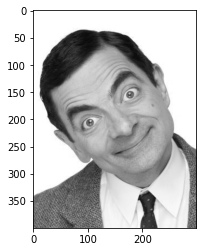

In [2]:
image = cv2.imread('mr_bean.jpeg',0)
rows, cols = image.shape
plt.imshow(image, cmap='gray')

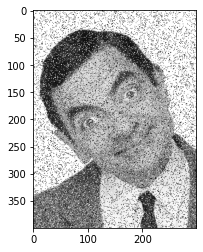

In [3]:
for i in range(rows):
    for j in range(cols):
        mylist = [0,1]
        r = random.choices(mylist, weights = [8, 2])[0]
        if  r== 1:
            image[i][j] = random.choices([0,255])[0]
            
plt.imshow(image, cmap='gray')

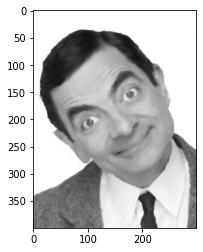

In [4]:
median_image = cv2.medianBlur(image, ksize=5)
plt.imshow(median_image, cmap='gray')

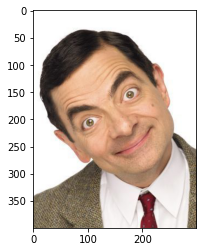

In [5]:
img = plt.imread('mr_bean.jpeg')
plt.imshow(img)

In [6]:
face_detector = MTCNN()

In [7]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    print(result_list)
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            # show the plot
            
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

In [8]:
results = face_detector.detect_faces(img)
results

2021-12-28 17:31:13.753616: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


[{'box': [49, 95, 198, 211],
  'confidence': 0.998329222202301,
  'keypoints': {'left_eye': (105, 201),
   'right_eye': (178, 158),
   'nose': (164, 223),
   'mouth_left': (146, 264),
   'mouth_right': (213, 225)}}]

[{'box': [49, 95, 198, 211], 'confidence': 0.998329222202301, 'keypoints': {'left_eye': (105, 201), 'right_eye': (178, 158), 'nose': (164, 223), 'mouth_left': (146, 264), 'mouth_right': (213, 225)}}]


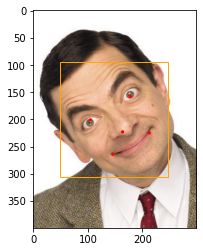

In [9]:
draw_facebox_and_keypoints('mr_bean.jpeg', results)

In [10]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [11]:
def alignment_procedure(img, left_eye, right_eye):

    #this function aligns given face in img based on left and right eye coordinates

    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    #-----------------------
    #find rotation direction

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    #-----------------------
    #find length of triangle edges

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    #-----------------------

    #apply cosine rule

    if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        #-----------------------
        #rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    #-----------------------

    return img #return img anyway


In [12]:
detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(img, left_eye, right_eye)

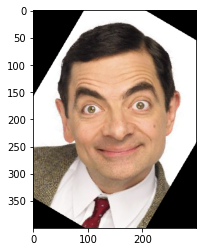

In [13]:
plt.imshow(img)